![Colab](https://www.tensorflow.org/images/colab_logo_32px.png) [Run in Google Colab](https://colab.research.google.com/drive/1R0yKRFWQvmXl9KbMS-CDlJ-EtY2ntzuy?usp=sharing) ![GitHub](https://www.tensorflow.org/images/GitHub-Mark-32px.png) [View source on GitHub](https://github.com/TanyaYu/Curriculum-Project/blob/master/module2/Categorical_Classification.ipynb)

# The Vehicle Dataset

The vehicle dataset was collected by Leetron Vision for A.I. Count project - a portable real-time video-based traffic counting unit. The size of the dataset is almost 15,000 samples. Each sample is a vehicle image 64x32 px. The dataset includes 6 different types of vehicles: 
- Class 1 - Motorcycles
- Class 2 - Cars
- Class 3 - Pickup Trucks
- Class 4 - Buses
- Class 5 - Trucks
- Class 6 - Tractor Trailers

![vehicle classes](https://storage.googleapis.com/vehicle-dataset/vehicle%20classes.png)

Each image has a color line on the left. A green line identifies that the vehicle is in lane 1, blue - lane 2, and red - lane 3.

![AI Count](https://storage.googleapis.com/vehicle-dataset/AI%20Count.png)

# Vehicles 3k
Vehicles 3k dataset is a part of the full dataset and includes only 3,000 samples. The dataset has the following directory structure:
```
vehicles_3k
|__ Class1
|__ Class2
|__ Class3
|__ Class4
|__ Class5
|__ Class6
```

It's available for download [here](https://storage.googleapis.com/vehicle-dataset/vehicles_3k.zip).

# Import packages

In [1]:
import glob
import pandas as pd
import random as rand

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.utils import get_file
from os.path import join, dirname, basename

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data

In [2]:
url = 'https://storage.googleapis.com/vehicle-dataset/vehicles_3k.zip'
path_to_zip =get_file('vehicles_3k.zip', origin=url, extract=True)
path = join(dirname(path_to_zip), 'vehicles_3k')

In [3]:
# This function plots images from a folder. 
def plot_images(source_path):
    files=[]
    classes = glob.glob(source_path + '/*')
    for class_path in classes:
        files.extend([f for f in glob.glob(class_path + "/*", recursive=True)])
    rand.shuffle(files)
    plt.figure(figsize=(16, 8))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        img = image.load_img(files[i], target_size=(32, 64))
        plt.imshow(img, cmap=plt.cm.binary)
    plt.show()

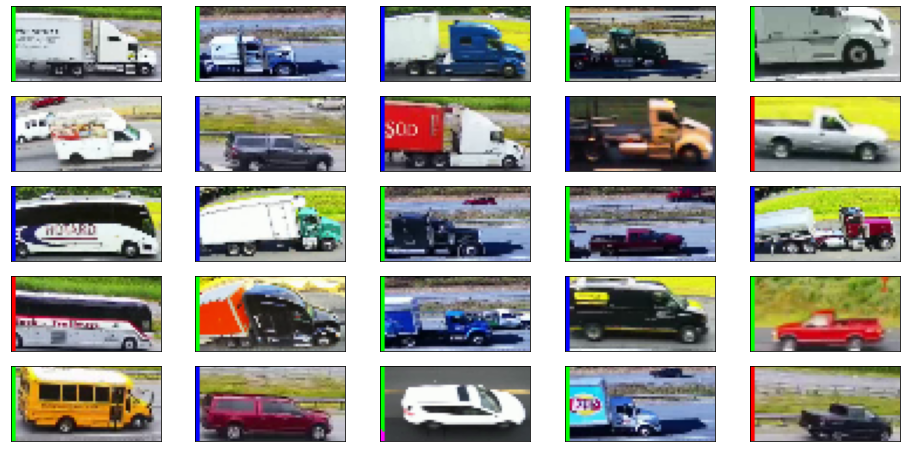

In [4]:
plot_images(path)

# Data Prepocessing

In [5]:
files = []
classes = glob.glob(path + '/*')
for class_path in classes:
    files.extend([f for f in glob.glob(class_path + "/*", recursive=True)])

In [6]:
X = files
y = [basename(dirname(f)) for f in files]

In [7]:
df = pd.DataFrame({"filename": X, "class": y}) 

In [8]:
train_len = round(len(files) * 0.8)

train_df = df[:train_len]
test_df = df[train_len:]

In [9]:
batch_size = 56
epochs = 10
IMG_HEIGHT = 32
IMG_WIDTH = 64
class_names = ['Class1', 'Class2', 'Class3', 'Class4', 'Class5', 'Class6']

In [10]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2) 
train_data_gen = image_generator.flow_from_dataframe(dataframe=train_df,
                                                     x_col="filename",
                                                     y_col="class",
                                                     subset="training",
                                                     shuffle=True,
                                                     seed=42,
                                                     batch_size=batch_size,
                                                     classes=class_names,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode="categorical")
valid_data_gen = image_generator.flow_from_dataframe(dataframe=train_df,
                                                     x_col="filename",
                                                     y_col="class",
                                                     subset="validation",
                                                     shuffle=True,
                                                     seed=42,
                                                     batch_size=batch_size,
                                                     classes=class_names,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode="categorical")

Found 1920 validated image filenames belonging to 6 classes.
Found 480 validated image filenames belonging to 6 classes.


# Train

In [11]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(6, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32, 64, 16)        64        
_________________________________________________________________
dense_1 (Dense)              (None, 32, 64, 32)        544       
_________________________________________________________________
dense_2 (Dense)              (None, 32, 64, 64)        2112      
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               67109376  
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 3078      
Total params: 67,115,174
Trainable params: 67,115,174
Non-trainable params: 0
____________________________________________

In [12]:
model.compile(optimizer=Adam(lr=0.00001),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

In [13]:
history = model.fit_generator(
    train_data_gen,
    validation_data=valid_data_gen,
    epochs=epochs,
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
35/35 [==============================] - 3s 72ms/step - loss: 1.5507 - accuracy: 0.4474 - val_loss: 2.4115 - val_accuracy: 0.0000e+00
Epoch 2/10
35/35 [==============================] - 2s 64ms/step - loss: 1.4351 - accuracy: 0.3844 - val_loss: 2.0350 - val_accuracy: 0.0000e+00
Epoch 3/10
35/35 [==============================] - 2s 64ms/step - loss: 1.3622 - accuracy: 0.4339 - val_loss: 2.1273 - val_accuracy: 0.0000e+00
Epoch 4/10
35/35 [==============================] - 2s 64ms/step - loss: 1.2544 - accuracy: 0.5349 - val_loss: 2.2803 - val_accuracy: 0.0000e+00
Epoch 5/10
35/35 [==============================] - 2s 63ms/step - loss: 1.1395 - accuracy: 0.6036 - val_loss: 1.9143 - val_accuracy: 0.0000e+00
Epoch 6/10
35/35 [==============================] - 2s 64ms/step - loss: 1.0531 - accuracy: 0.6464 - val_loss: 1.9681 - val_accuracy: 0.0000e+00
Epoch 7/10
35/35 [==============================] - 2s

In [14]:
def plot_training_history(h):
    acc = h.history['accuracy']
    loss = h.history['loss']
    
    epochs_range = range(len(acc))

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    if 'val_accuracy' in h.history:
        val_acc = h.history['val_accuracy']
        plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    if 'val_loss' in h.history:
        val_loss = h.history['val_loss']
        plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Loss')
    plt.show()

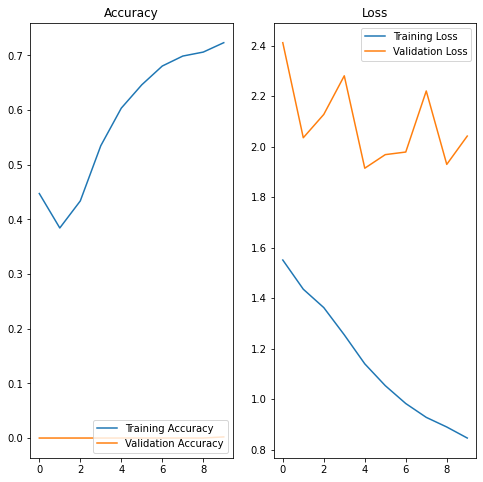

In [15]:
plot_training_history(history)

# Evaluate

In [16]:
image_generator = ImageDataGenerator(rescale=1./255) 
test_data_gen = image_generator.flow_from_dataframe(dataframe=test_df,
                                                    x_col="filename",
                                                    y_col="class",
                                                    shuffle=False,
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    classes=class_names,
                                                    class_mode="categorical")

Found 600 validated image filenames belonging to 6 classes.


In [17]:
def evaluate_model(m):
    train_eval = m.evaluate_generator(train_data_gen)
    valid_eval = m.evaluate_generator(valid_data_gen)
    test_eval = m.evaluate_generator(test_data_gen)
    print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f' % (train_eval[1]*100, train_eval[0]))
    print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f' % (valid_eval[1]*100, valid_eval[0]))
    print('Test Accuracy      : %1.2f%%     Test loss      : %1.6f' % (test_eval[1]*100, test_eval[0]))

In [18]:
evaluate_model(model)    

Instructions for updating:
Please use Model.evaluate, which supports generators.
Training Accuracy  : 73.33%     Training loss  : 0.822293
Validation Accuracy: 0.21%     Validation loss: 2.041595
Test Accuracy      : 0.00%     Test loss      : 2.913584


In [19]:
predicted = model.predict_classes(test_data_gen, batch_size=None)
test_result = pd.DataFrame({
    'filename':test_data_gen.filenames,
    'predict':predicted,
    'true':test_data_gen.classes
})
test_result.head()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


,filename,predict,true
0,/root/.keras/datasets/vehicles_3k/Class2/__222...,2,1
1,/root/.keras/datasets/vehicles_3k/Class2/__222...,2,1
2,/root/.keras/datasets/vehicles_3k/Class2/__222...,2,1
3,/root/.keras/datasets/vehicles_3k/Class2/__222...,2,1
4,/root/.keras/datasets/vehicles_3k/Class2/__222...,2,1


In [20]:
misclassified = test_result[test_result['true']!=test_result['predict']]
misclassified = misclassified.reset_index()
misclassified.head()

,index,filename,predict,true
0,0,/root/.keras/datasets/vehicles_3k/Class2/__222...,2,1
1,1,/root/.keras/datasets/vehicles_3k/Class2/__222...,2,1
2,2,/root/.keras/datasets/vehicles_3k/Class2/__222...,2,1
3,3,/root/.keras/datasets/vehicles_3k/Class2/__222...,2,1
4,4,/root/.keras/datasets/vehicles_3k/Class2/__222...,2,1


In [21]:
print('Total misclassified images from %d validation images: %d' % 
      (test_result['true'].count(), misclassified['true'].count()))

Total misclassified images from 600 validation images: 600


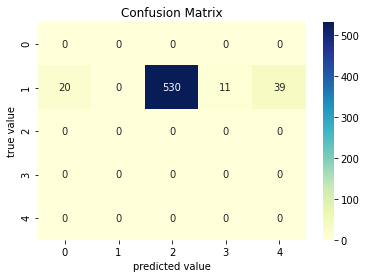

In [22]:
from sklearn.metrics import confusion_matrix 

plt.figure()
conf_matrix = confusion_matrix(test_result.true, test_result.predict)
sns.heatmap(conf_matrix, cmap="YlGnBu", annot=True, fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');
plt.title("Confusion Matrix");

# Exercises

## Exercise 1
The confusion matrix above shows only absolute numbers of misclassified samples. These values can be normalized by class support size (number of elements in each class). This kind of normalization can be interesting in the case of class imbalance to have a more visual interpretation of which class is being misclassified. Plot a **normalized confusion matrix** by setting `normalize='true'` parameter. Keep in mind that values in the normalized matrix are fractional numbers.

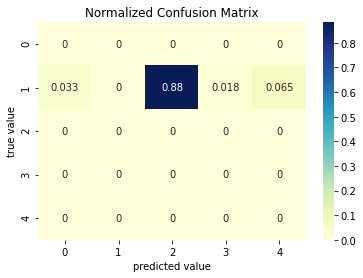

In [23]:
plt.figure()
conf_matrix_normalized = confusion_matrix(test_result.true, test_result.predict, normalize='true')
sns.heatmap(conf_matrix_normalized, cmap="YlGnBu", annot=True, fmt='.2g');
plt.xlabel('predicted value')
plt.ylabel('true value');
plt.title("Normalized Confusion Matrix");

## Exercise 2
According to the confusion matrix, only samples of one class were misclassified. It looks very suspicious. Let's **print value counts** of all classes of both the train and test portion and plot them in a **pie chart**. What do you notice and why did this happen?

In [24]:
train_df['class'].value_counts().sort_index()

Class1    145
Class2     59
Class3    659
Class4    220
Class5    658
Class6    659
Name: class, dtype: int64

In [25]:
test_df['class'].value_counts().sort_index()

Class2    600
Name: class, dtype: int64

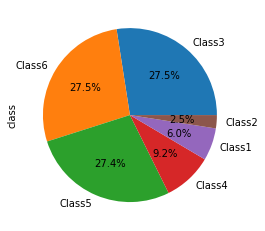

In [26]:
train_df['class'].value_counts().plot.pie(autopct='%1.1f%%')

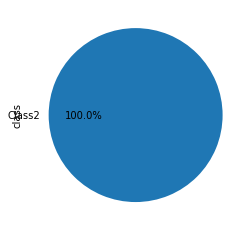

In [27]:
test_df['class'].value_counts().plot.pie(autopct='%1.1f%%')

## Exercise 3
Create a train and test portion of a dataset by using `train_test_split` function. Print value counts of all classes again and notice the difference. Train the model using a new dataset. How did results change?

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
train_df = pd.DataFrame({"filename": X_train, "class": y_train}) 
test_df = pd.DataFrame({"filename": X_test, "class": y_test}) 

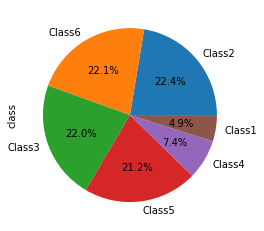

In [30]:
train_df['class'].value_counts().plot.pie(autopct='%1.1f%%')

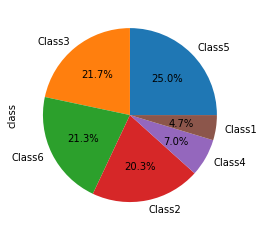

In [31]:
test_df['class'].value_counts().plot.pie(autopct='%1.1f%%')

In [32]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2) 
train_data_gen = image_generator.flow_from_dataframe(dataframe=train_df,
                                                     x_col="filename",
                                                     y_col="class",
                                                     subset="training",
                                                     shuffle=True,
                                                     seed=42,
                                                     batch_size=batch_size,
                                                     classes=class_names,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode="categorical")
valid_data_gen = image_generator.flow_from_dataframe(dataframe=train_df,
                                                     x_col="filename",
                                                     y_col="class",
                                                     subset="validation",
                                                     shuffle=True,
                                                     seed=42,
                                                     batch_size=batch_size,
                                                     classes=class_names,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode="categorical")
image_generator = ImageDataGenerator(rescale=1./255) 
test_data_gen = image_generator.flow_from_dataframe(dataframe=test_df,
                                                    x_col="filename",
                                                    y_col="class",
                                                    shuffle=False,
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    classes=class_names,
                                                    class_mode="categorical")

Found 1920 validated image filenames belonging to 6 classes.
Found 480 validated image filenames belonging to 6 classes.
Found 600 validated image filenames belonging to 6 classes.


Epoch 1/10
35/35 [==============================] - 2s 69ms/step - loss: 1.6478 - accuracy: 0.3177 - val_loss: 1.5673 - val_accuracy: 0.3521
Epoch 2/10
35/35 [==============================] - 2s 64ms/step - loss: 1.4981 - accuracy: 0.4177 - val_loss: 1.4010 - val_accuracy: 0.4542
Epoch 3/10
35/35 [==============================] - 2s 65ms/step - loss: 1.3577 - accuracy: 0.4594 - val_loss: 1.3070 - val_accuracy: 0.4750
Epoch 4/10
35/35 [==============================] - 2s 64ms/step - loss: 1.2634 - accuracy: 0.5010 - val_loss: 1.2089 - val_accuracy: 0.5354
Epoch 5/10
35/35 [==============================] - 2s 63ms/step - loss: 1.1889 - accuracy: 0.5505 - val_loss: 1.1885 - val_accuracy: 0.5167
Epoch 6/10
35/35 [==============================] - 2s 65ms/step - loss: 1.1270 - accuracy: 0.5729 - val_loss: 1.1400 - val_accuracy: 0.5437
Epoch 7/10
35/35 [==============================] - 2s 65ms/step - loss: 1.0748 - accuracy: 0.5875 - val_loss: 1.0801 - val_accuracy: 0.5813
Epoch 8/10
35

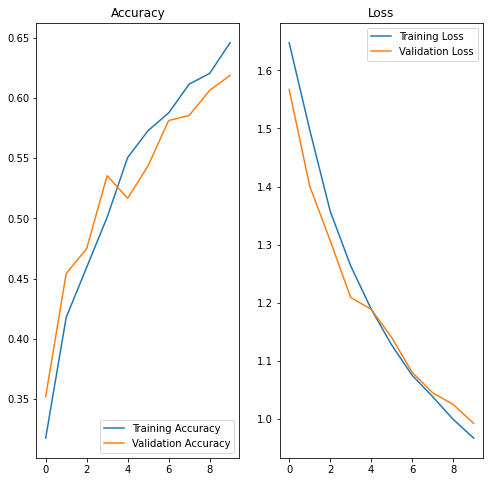

Training Accuracy  : 66.25%     Training loss  : 0.937571
Validation Accuracy: 61.87%     Validation loss: 0.992039
Test Accuracy      : 58.50%     Test loss      : 1.041995


In [33]:
# Check how accuracy improved
model = Sequential([
    Dense(16, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(6, activation='sigmoid')
])

model.compile(optimizer=Adam(lr=0.00001),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit_generator(
    train_data_gen,
    validation_data=valid_data_gen,
    epochs=epochs,
)

plot_training_history(history)
evaluate_model(model)

## Exercise 4
This type of problem image recognition and classification could be effectively solved by **Convolutional Neural Networks** (ConvNets or CNNs). Replace first three Dense layers with Conv2D layer followed by MaxPooling2D. You may experiment with number of filters and kernel size of the convolutional layers. Evaluate the model and analyze the difference in accuracy.

In [34]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(6, activation='sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 16, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 16, 64)         18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)             

In [35]:
model.compile(optimizer=Adam(lr=0.0001),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

In [36]:
history = model.fit_generator(
    train_data_gen,
    validation_data=valid_data_gen,
    epochs=epochs,
)

Epoch 1/10
35/35 [==============================] - 1s 31ms/step - loss: 1.6790 - accuracy: 0.2615 - val_loss: 1.6322 - val_accuracy: 0.2250
Epoch 2/10
35/35 [==============================] - 1s 25ms/step - loss: 1.6103 - accuracy: 0.3313 - val_loss: 1.5419 - val_accuracy: 0.4125
Epoch 3/10
35/35 [==============================] - 1s 24ms/step - loss: 1.4707 - accuracy: 0.4062 - val_loss: 1.3437 - val_accuracy: 0.5042
Epoch 4/10
35/35 [==============================] - 1s 25ms/step - loss: 1.2816 - accuracy: 0.4734 - val_loss: 1.2044 - val_accuracy: 0.4979
Epoch 5/10
35/35 [==============================] - 1s 29ms/step - loss: 1.1265 - accuracy: 0.5479 - val_loss: 1.1103 - val_accuracy: 0.5542
Epoch 6/10
35/35 [==============================] - 1s 24ms/step - loss: 1.0431 - accuracy: 0.5729 - val_loss: 1.0031 - val_accuracy: 0.5833
Epoch 7/10
35/35 [==============================] - 1s 24ms/step - loss: 0.9655 - accuracy: 0.6047 - val_loss: 0.9469 - val_accuracy: 0.6146
Epoch 8/10
35

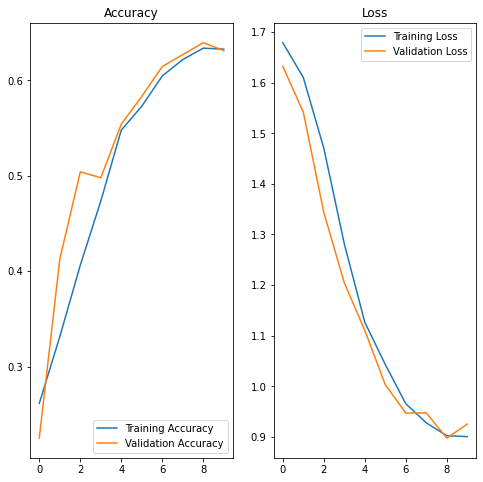

In [37]:
plot_training_history(history)

In [38]:
evaluate_model(model)   

Training Accuracy  : 61.35%     Training loss  : 0.907573
Validation Accuracy: 63.13%     Validation loss: 0.925154
Test Accuracy      : 60.33%     Test loss      : 0.963482


## Exercise 5
1. Train the model for 15 epochs and using optimizer `Adam(lr=1e-6)`. Compare train and validation loss. Compare train and validation accuracy. Is the model overfitting or underfitting? 
2. Now reinitialize the model and train for 15 epochs again but using optimizer `Adam(lr=1e-3)` this time. Is the model overfitting or underfitting now? 
3. Plot the training history for both models and note the difference. Looking at the train and validation loss graphs answer the question, when did the model start overfitting? How can we avoid underfitting and overfitting?

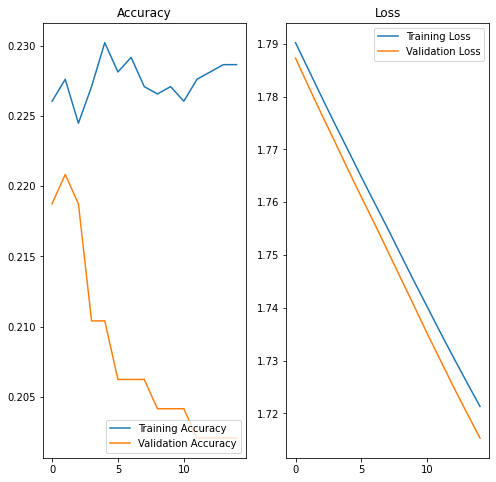

Training Accuracy  : 22.86%     Training loss  : 1.718930
Validation Accuracy: 20.21%     Validation loss: 1.715349
Test Accuracy      : 21.67%     Test loss      : 1.716423


In [39]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(6, activation='sigmoid')
])

model.compile(optimizer=Adam(lr=1e-6),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit_generator(
    train_data_gen,
    validation_data=valid_data_gen,
    epochs=15,
    verbose=0,
)

plot_training_history(history)

evaluate_model(model)

In [40]:
# The model above underfits because validation loss < training loss.
# We can identify underfitting on the loss graph when we notice that the validation loss graph 
# is below the train loss graph. And they both are decreasing. 
# To identify underfitting on the graph we look for validation loss and train loss are decreasing and
# validation loss graph is below the train loss graph.
# To avoid underfitting we could either train the model longer or increase the learning rate

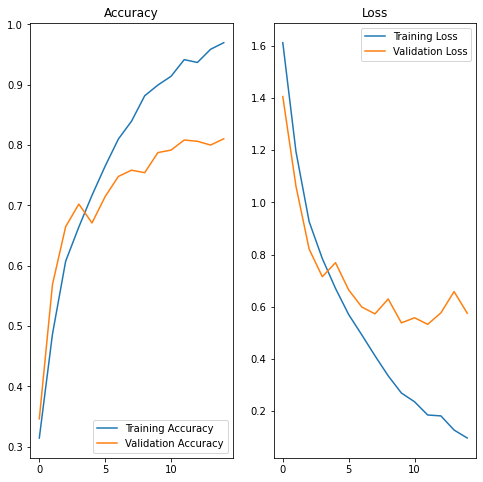

Training Accuracy  : 99.43%     Training loss  : 0.049748
Validation Accuracy: 81.04%     Validation loss: 0.575342
Test Accuracy      : 79.83%     Test loss      : 0.674816


In [41]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(6, activation='sigmoid')
])

model.compile(optimizer=Adam(lr=1e-3),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit_generator(
    train_data_gen,
    validation_data=valid_data_gen,
    epochs=15,
    verbose=0,
)

plot_training_history(history)

evaluate_model(model)

In [42]:
# The model above is overfitting because validation loss > training loss. By looking at the graph we can 
# estimate that the overfitting started after the 6th epoch when validation loss started to increase.
# To identify overfitting on a graph we look for rapid increase or no change in validation loss while 
# train loss is decreasing. 
# To prevent overfitting we could decrease the learning rate or train the model for a shorter time. 

## Exercise 6
Experiment with the bach size. How does it affect the training process and the result? Tweak the hyperparameters such as validation split, learning rate, optimizer, etc. Try to avoid model underfitting or overfitting.

In [43]:
# to change batch size we need to reinialize the data generatior
batch_size = 32
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2) 
train_data_gen = image_generator.flow_from_dataframe(dataframe=train_df,
                                                     x_col="filename",
                                                     y_col="class",
                                                     subset="training",
                                                     shuffle=True,
                                                     seed=42,
                                                     batch_size=batch_size,
                                                     classes=class_names,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode="categorical")
valid_data_gen = image_generator.flow_from_dataframe(dataframe=train_df,
                                                     x_col="filename",
                                                     y_col="class",
                                                     subset="validation",
                                                     shuffle=True,
                                                     seed=42,
                                                     batch_size=batch_size,
                                                     classes=class_names,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode="categorical")

Found 1920 validated image filenames belonging to 6 classes.
Found 480 validated image filenames belonging to 6 classes.


Epoch 1/30
60/60 [==============================] - 1s 19ms/step - loss: 1.6722 - accuracy: 0.2354 - val_loss: 1.6241 - val_accuracy: 0.2250
Epoch 2/30
60/60 [==============================] - 1s 17ms/step - loss: 1.5774 - accuracy: 0.3464 - val_loss: 1.4683 - val_accuracy: 0.3604
Epoch 3/30
60/60 [==============================] - 1s 17ms/step - loss: 1.3423 - accuracy: 0.4370 - val_loss: 1.2231 - val_accuracy: 0.4875
Epoch 4/30
60/60 [==============================] - 1s 17ms/step - loss: 1.1223 - accuracy: 0.5568 - val_loss: 1.0440 - val_accuracy: 0.5646
Epoch 5/30
60/60 [==============================] - 1s 17ms/step - loss: 1.0223 - accuracy: 0.5708 - val_loss: 1.0251 - val_accuracy: 0.5417
Epoch 6/30
60/60 [==============================] - 1s 17ms/step - loss: 0.9439 - accuracy: 0.6062 - val_loss: 0.9592 - val_accuracy: 0.5896
Epoch 7/30
60/60 [==============================] - 1s 17ms/step - loss: 0.8975 - accuracy: 0.6307 - val_loss: 0.8624 - val_accuracy: 0.6542
Epoch 8/30
60

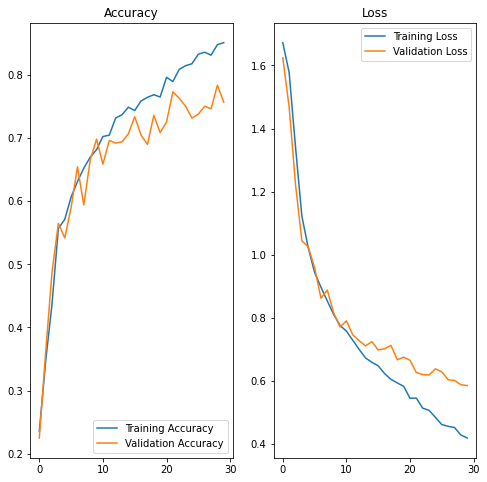

Training Accuracy  : 87.14%     Training loss  : 0.382224
Validation Accuracy: 75.63%     Validation loss: 0.585355
Test Accuracy      : 75.33%     Test loss      : 0.656860


In [44]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(6, activation='sigmoid')
])

model.compile(optimizer=Adam(lr=1e-4),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit_generator(
    train_data_gen,
    validation_data=valid_data_gen,
    epochs=30,
)

plot_training_history(history)

evaluate_model(model)

## Exercise 7
A simple way to prevent a neural network from overfitting is using **Dropout** layers. During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer.
Add a couple of Dropout layers to your model and analyze the difference. 

Epoch 1/30
60/60 [==============================] - 1s 19ms/step - loss: 1.6829 - accuracy: 0.2500 - val_loss: 1.6526 - val_accuracy: 0.3083
Epoch 2/30
60/60 [==============================] - 1s 17ms/step - loss: 1.6319 - accuracy: 0.2990 - val_loss: 1.6117 - val_accuracy: 0.3167
Epoch 3/30
60/60 [==============================] - 1s 17ms/step - loss: 1.5168 - accuracy: 0.3443 - val_loss: 1.4870 - val_accuracy: 0.4563
Epoch 4/30
60/60 [==============================] - 1s 17ms/step - loss: 1.3442 - accuracy: 0.4411 - val_loss: 1.3640 - val_accuracy: 0.4208
Epoch 5/30
60/60 [==============================] - 1s 17ms/step - loss: 1.2188 - accuracy: 0.4906 - val_loss: 1.2090 - val_accuracy: 0.5312
Epoch 6/30
60/60 [==============================] - 1s 17ms/step - loss: 1.1255 - accuracy: 0.5432 - val_loss: 1.1050 - val_accuracy: 0.5562
Epoch 7/30
60/60 [==============================] - 1s 17ms/step - loss: 1.0802 - accuracy: 0.5531 - val_loss: 1.0417 - val_accuracy: 0.6062
Epoch 8/30
60

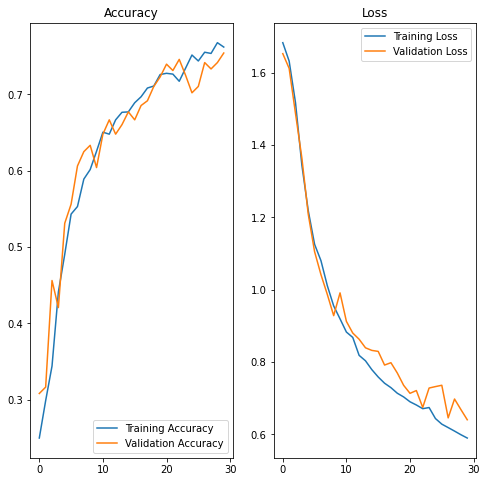

Training Accuracy  : 82.76%     Training loss  : 0.516280
Validation Accuracy: 75.42%     Validation loss: 0.640422
Test Accuracy      : 71.67%     Test loss      : 0.700290


In [54]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Dropout(0.2), #Applying dropout will randomly set 20% of the neurons to zero during each training epoch.
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2), #Applying dropout will randomly set 20% of the neurons to zero during each training epoch.
    Flatten(),
    Dense(512, activation='relu'),
    Dense(6, activation='sigmoid')
])

model.compile(optimizer=Adam(lr=1e-4),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit_generator(
    train_data_gen,
    validation_data=valid_data_gen,
    epochs=30,
)

plot_training_history(history)

evaluate_model(model)

## Exercise 8
Another way to avoid overfitting is to stop training when validation loss stopped improving. It can be implemented by using `EarlyStopping` callback. Add `EarlyStopping` to your model.

In [46]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

Epoch 1/50
60/60 [==============================] - 1s 19ms/step - loss: 1.6626 - accuracy: 0.2516 - val_loss: 1.5753 - val_accuracy: 0.2625
Epoch 2/50
60/60 [==============================] - 1s 17ms/step - loss: 1.3514 - accuracy: 0.4396 - val_loss: 1.1239 - val_accuracy: 0.5458
Epoch 3/50
60/60 [==============================] - 1s 17ms/step - loss: 1.0655 - accuracy: 0.5547 - val_loss: 0.9585 - val_accuracy: 0.5833
Epoch 4/50
60/60 [==============================] - 1s 17ms/step - loss: 0.9232 - accuracy: 0.6120 - val_loss: 0.8406 - val_accuracy: 0.6583
Epoch 5/50
60/60 [==============================] - 1s 17ms/step - loss: 0.7979 - accuracy: 0.6630 - val_loss: 0.8070 - val_accuracy: 0.6313
Epoch 6/50
60/60 [==============================] - 1s 17ms/step - loss: 0.7406 - accuracy: 0.6943 - val_loss: 0.7262 - val_accuracy: 0.6854
Epoch 7/50
60/60 [==============================] - 1s 17ms/step - loss: 0.6761 - accuracy: 0.7214 - val_loss: 0.6989 - val_accuracy: 0.7104
Epoch 8/50
60

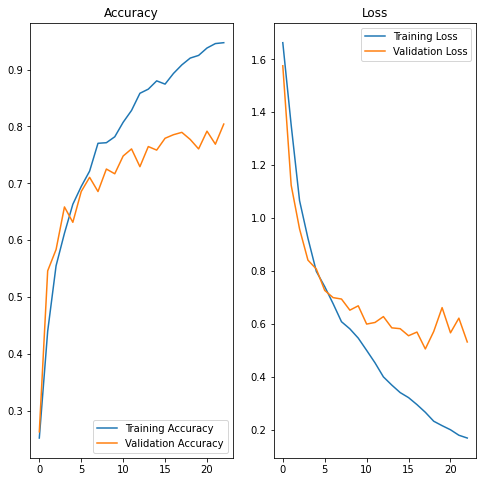

Training Accuracy  : 97.76%     Training loss  : 0.106259
Validation Accuracy: 80.42%     Validation loss: 0.531237
Test Accuracy      : 79.50%     Test loss      : 0.589048


In [53]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(6, activation='sigmoid')
])

model.compile(optimizer=Adam(lr=3e-4),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit_generator(
    train_data_gen,
    validation_data=valid_data_gen,
    epochs=50,
    callbacks=[early_stop]
)

plot_training_history(history)

evaluate_model(model)

## Exercise 9
Having a small dataset may overfit the model very quickly. To increase the ability and performance of the model, or to generalize the model we need a proper dataset so that we can train our model. [Data Augmentation](https://colab.research.google.com/drive/1u9HA5LBvyp135NBpk45Uud2vEI1OFYOe?usp=sharing) helps you to achieve this.

Apply **image augmentation** to your model and analyze its performance.

In [55]:
augm_image_generator = ImageDataGenerator(rescale=1./255,
                                         width_shift_range=.15,
                                         height_shift_range=.15,
                                         brightness_range=(0.1,0.9),
                                         zoom_range=0.3,
                                         channel_shift_range=150,
                                         horizontal_flip=True,
                                         validation_split=0.2) 
train_augm_data_gen = augm_image_generator.flow_from_dataframe(dataframe=train_df,
                                                             x_col="filename",
                                                             y_col="class",
                                                             subset="training",
                                                             shuffle=True,
                                                             seed=42,
                                                             batch_size=batch_size,
                                                             classes=class_names,
                                                             target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                             class_mode="categorical")
valid_augm_data_gen = augm_image_generator.flow_from_dataframe(dataframe=train_df,
                                                             x_col="filename",
                                                             y_col="class",
                                                             subset="validation",
                                                             shuffle=True,
                                                             seed=42,
                                                             batch_size=batch_size,
                                                             classes=class_names,
                                                             target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                             class_mode="categorical")

Found 1920 validated image filenames belonging to 6 classes.
Found 480 validated image filenames belonging to 6 classes.


Epoch 1/80
60/60 [==============================] - 4s 72ms/step - loss: 1.6948 - accuracy: 0.2151 - val_loss: 1.6373 - val_accuracy: 0.2396
Epoch 2/80
60/60 [==============================] - 4s 71ms/step - loss: 1.6171 - accuracy: 0.2458 - val_loss: 1.5793 - val_accuracy: 0.2792
Epoch 3/80
60/60 [==============================] - 4s 71ms/step - loss: 1.5374 - accuracy: 0.3151 - val_loss: 1.4900 - val_accuracy: 0.3333
Epoch 4/80
60/60 [==============================] - 4s 72ms/step - loss: 1.4709 - accuracy: 0.3583 - val_loss: 1.3718 - val_accuracy: 0.3938
Epoch 5/80
60/60 [==============================] - 4s 72ms/step - loss: 1.4127 - accuracy: 0.3734 - val_loss: 1.3664 - val_accuracy: 0.3896
Epoch 6/80
60/60 [==============================] - 4s 72ms/step - loss: 1.3580 - accuracy: 0.4125 - val_loss: 1.3826 - val_accuracy: 0.4104
Epoch 7/80
60/60 [==============================] - 4s 72ms/step - loss: 1.3084 - accuracy: 0.4307 - val_loss: 1.3161 - val_accuracy: 0.4583
Epoch 8/80
60

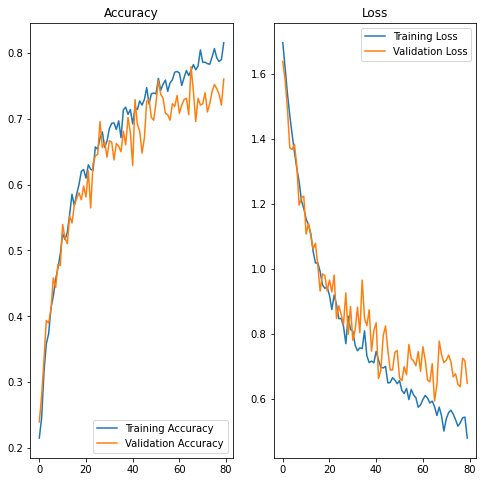

Training Accuracy  : 90.89%     Training loss  : 0.232962
Validation Accuracy: 83.33%     Validation loss: 0.467958
Test Accuracy      : 80.33%     Test loss      : 0.502789


In [56]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(6, activation='sigmoid')
])

model.compile(optimizer=Adam(lr=2e-3),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit_generator(
    train_augm_data_gen,
    validation_data=valid_augm_data_gen,
    epochs=80,
)

plot_training_history(history)

evaluate_model(model)

## Exercise 10
Plot misclassified samples. What kind of images are they? Why do you think they were misclassified?

In [50]:
predicted = model.predict_classes(test_data_gen, batch_size=None)
test_result = pd.DataFrame({
    'filename':test_data_gen.filenames,
    'predict':predicted,
    'true':test_data_gen.classes
})
misclassified = test_result[test_result['true']!=test_result['predict']]
misclassified = misclassified.reset_index()

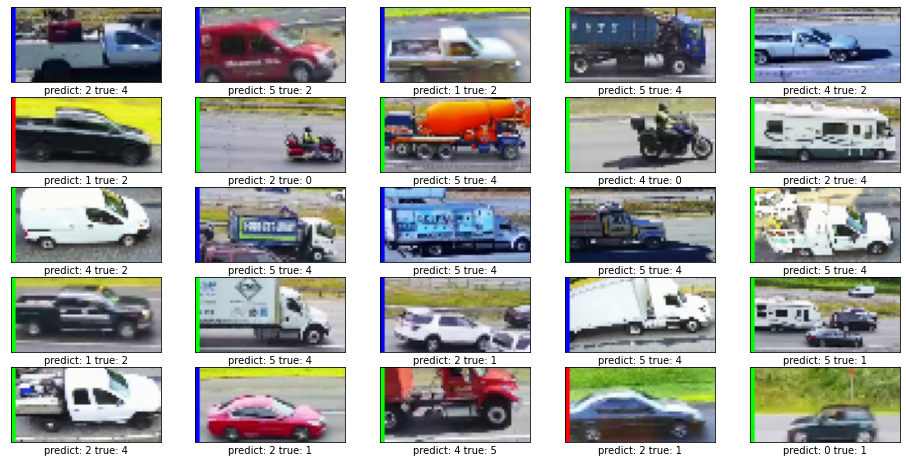

In [51]:
plt.figure(figsize=(16, 8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    img = image.load_img(misclassified.filename[i], target_size=(IMG_HEIGHT, IMG_WIDTH))
    plt.imshow(img, cmap=plt.cm.binary)
    label = "predict: " + str(misclassified.predict[i]) + " true: " + str(misclassified.true[i])
    plt.xlabel(label)
plt.show()

## Exercise 11
Build a model to classify samples of the full vehicle dataset.

In [ ]:
url = 'https://storage.googleapis.com/vehicle-dataset/vehicles_full.zip'
path_to_zip =get_file('vehicles_full.zip', origin=url, extract=True)
path = join(dirname(path_to_zip), 'vehicles_full')

In [ ]:
plot_images(path)